In [29]:
import torch
import torch.nn as nn #neural network
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Data Preprocessing

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("digit-recognizer/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Preview the image
X_train = train.drop(labels=["label"], axis=1).values #this is to drop the label data to only get the pixels
X_train = X_train / 255.0 #This is to scale our data points between the values of 0 - 1
X_train = X_train.reshape(-1,1,28,28) #Reshape to (Batch, Channel, Height, Width)
print(X_train)

X_test  = test / 255.0 #This is to scale our data points between the values of 0 - 1
X_test = X_test.values.reshape(-1,1,28,28)
print(X_test)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 ...


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. 

Convert to PyTorch tensors

In [32]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
print(X_train_tensor)
print(X_test_tensor)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [27]:
y_train = train["label"].values
print(y_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
print(y_train_tensor)

[1 0 1 ... 7 6 9]
tensor([1, 0, 1,  ..., 7, 6, 9])


Combine Features and labels into a dataset

In [38]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, torch.zeros(len(X_test_tensor), dtype=torch.long)) #Dummy labels for test set
print(train_dataset)
print(test_dataset)

In [40]:
# Use DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<function matplotlib.pyplot.show(close=None, block=None)>

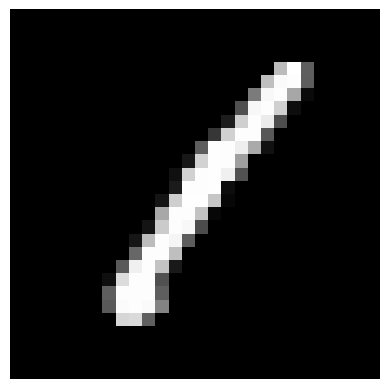

In [15]:
image = X_train[0, 0, :, :]
print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show

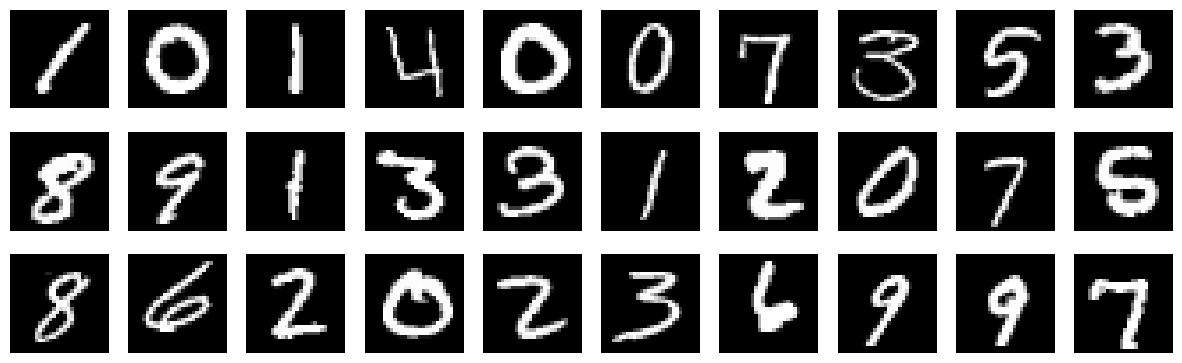

In [16]:
fig, axes = plt.subplots(3, 10, figsize=(15, 4.5))  # 3 row, 10 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i, 0, :, :], cmap='gray')  # Extract each image
    ax.axis('off')  # Remove axis labels
plt.show()

axes.flat - flattens the 2D array into a 1D iterator
enumerate - adds an index(i) to the loop. It generates pairs (index, element) for every iteration. This gives you an index i for each subplot.
enumerate just gives both the index and the subplot axis(ax) for each iteration

When to loop with enumerate:
If you need to use the index of each suplot for some reason (e.g., labeling suplots uniquely, selecting specific data for each subplot)
When to loop without enumerate:
If you only need access each suplot axies(ax) and you don't care about the index i




CNN Starts now

In [7]:
class CNN(nn.Module): #nn.Module provide functionality for the CNN
    def __init__(self): #constructor and a subclass all learnable parameters can turn into parameters objects
        super(CNN, self).__init__() #this access different parts of the parent class
        self.cnn_model = nn.Sequential( #this takes in all of the neural network layers
            nn.Conv2d(in_channels=1, out_channels = 6, kernel_size= 5), # 1 input channel (black and white) 6 filters with a Kernel_size of 5
            nn.Tanh(), #Apply tanh for non linearity
            nn.AvgPool2d(kernel_size= 2, stride = 2), #Kernel Size of 2 and stride as 2
            nn.Conv2d(in_channels= 6, out_channels = 16, kernel_size = 5), #the output channel is the input of the second convolutional layer
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride = 2)
            ) 
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120), #This is flattening
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10)
        )
    def forward(self, x): #x is the input image
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1) #this flattens the 2d arrays
        x = self.fc_model(x)
        x = F.softmax(x)
        return x

In [10]:
model = CNN()
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [11]:
model.cnn_model[0]
model.cnn_model[0].weight


Parameter containing:
tensor([[[[-0.1150, -0.0624,  0.1720,  0.0600,  0.0370],
          [ 0.1627,  0.1190, -0.0697,  0.1280,  0.1370],
          [-0.0962,  0.1925,  0.0322,  0.0073, -0.0594],
          [-0.1502, -0.1743, -0.0497, -0.0356, -0.0612],
          [-0.1124, -0.1414,  0.0320,  0.1319, -0.1660]]],


        [[[-0.1958, -0.1735,  0.1014, -0.1708,  0.1333],
          [ 0.1548, -0.1134,  0.0696, -0.0382,  0.0358],
          [ 0.1295, -0.1474, -0.0828,  0.0196, -0.1397],
          [ 0.0313, -0.1978,  0.1831,  0.1625,  0.0185],
          [-0.1445, -0.0920,  0.0817,  0.1587, -0.0338]]],


        [[[-0.1341,  0.0026, -0.1001, -0.0783,  0.0858],
          [ 0.0583,  0.0762,  0.1111, -0.0827,  0.0677],
          [ 0.1284, -0.0243, -0.0071,  0.1139,  0.1852],
          [-0.0305,  0.1299, -0.1165, -0.1802, -0.0991],
          [ 0.0910,  0.1703, -0.0460, -0.1397,  0.0412]]],


        [[[ 0.1234,  0.1202,  0.1471, -0.1105, -0.1814],
          [-0.0984, -0.0808,  0.1870, -0.0762, -0.0049

Training the Model

In [48]:
learningRate = 0.0001
EPOCH = 30
optimizer = torch.optim.Adam(model.parameters(), lr = learningRate)
loss_function = nn.CrossEntropyLoss()
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [49]:
for epoch in range(1, EPOCH + 1):
    model.train()  # Set the model to training mode
    losses = []  # Track losses
    correct_predictions = 0  # Track correct predictions
    total_samples = 0  # Track total samples processed

    for inputs, labels in train_loader:  # Batch loop
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        predictions = model(inputs)  # Raw logits from the model

        # Compute loss
        loss = loss_function(predictions, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        # Track loss
        losses.append(loss.item())

        # Compute accuracy
        preds = torch.argmax(predictions, dim=1)  # Get predicted class indices
        correct_predictions += (preds == labels).sum().item()  # Count correct predictions
        total_samples += labels.size(0)  # Update total samples processed

    # Compute average loss and accuracy for the epoch
    avg_loss = sum(losses) / len(losses)
    accuracy = correct_predictions / total_samples * 100  # Convert to percentage

    print(f"Epoch {epoch}/{EPOCH}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


C:\Users\chris\AppData\Local\Temp\ipykernel_47940\2831627634.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Epoch 1/30, Loss: 1.4663, Accuracy: 99.55%
Epoch 2/30, Loss: 1.4662, Accuracy: 99.55%
Epoch 3/30, Loss: 1.4661, Accuracy: 99.56%
Epoch 4/30, Loss: 1.4660, Accuracy: 99.56%
Epoch 5/30, Loss: 1.4659, Accuracy: 99.58%
Epoch 6/30, Loss: 1.4658, Accuracy: 99.60%
Epoch 7/30, Loss: 1.4657, Accuracy: 99.60%
Epoch 8/30, Loss: 1.4655, Accuracy: 99.60%
Epoch 9/30, Loss: 1.4655, Accuracy: 99.61%
Epoch 10/30, Loss: 1.4655, Accuracy: 99.61%
Epoch 11/30, Loss: 1.4655, Accuracy: 99.61%
Epoch 12/30, Loss: 1.4654, Accuracy: 99.62%
Epoch 13/30, Loss: 1.4654, Accuracy: 99.63%
Epoch 14/30, Loss: 1.4652, Accuracy: 99.63%
Epoch 15/30, Loss: 1.4651, Accuracy: 99.64%
Epoch 16/30, Loss: 1.4651, Accuracy: 99.63%
Epoch 17/30, Loss: 1.4651, Accuracy: 99.64%
Epoch 18/30, Loss: 1.4650, Accuracy: 99.64%
Epoch 19/30, Loss: 1.4651, Accuracy: 99.64%
Epoch 20/30, Loss: 1.4649, Accuracy: 99.65%
Epoch 21/30, Loss: 1.4648, Accuracy: 99.66%
Epoch 22/30, Loss: 1.4649, Accuracy: 99.65%
Epoch 23/30, Loss: 1.4649, Accuracy: 99.6

In [50]:
# Save model weights
torch.save(model.state_dict(), "model_weights.pth")
print("Model weights saved!")

Model weights saved!


In [58]:
# Load model weights
model = CNN()  # Recreate your model architecture
model.load_state_dict(torch.load("model_weights.pth"))
model.to(device)  # Move model to the appropriate device (CPU/GPU)
print("Model weights loaded!")


Model weights loaded!


C:\Users\chris\AppData\Local\Temp\ipykernel_47940\1560943743.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights.pth"))


C:\Users\chris\AppData\Local\Temp\ipykernel_47940\2831627634.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


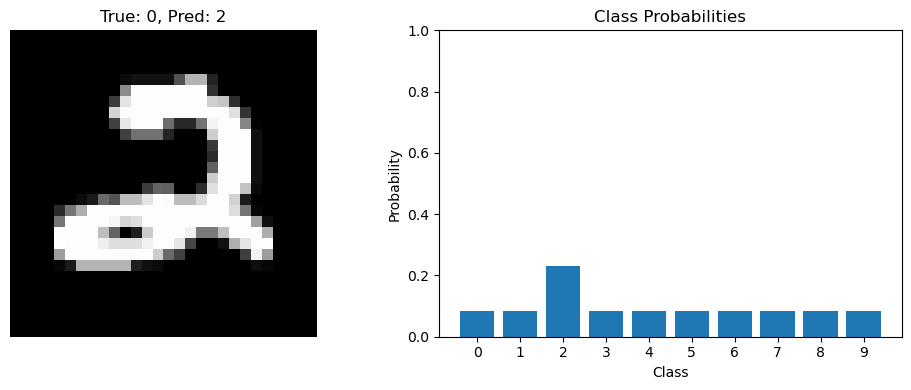

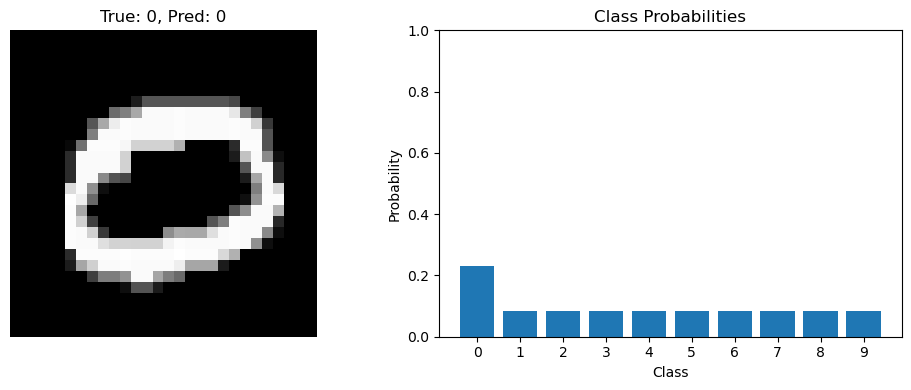

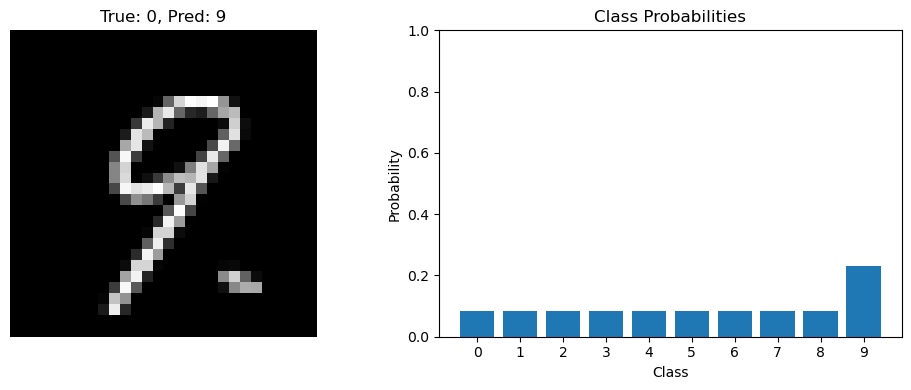

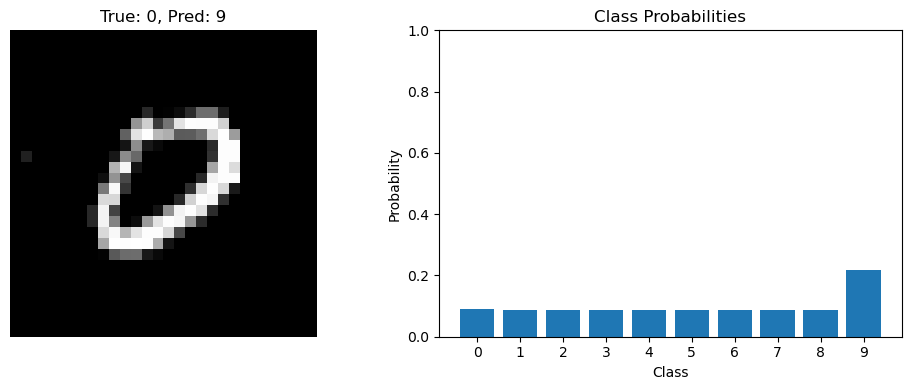

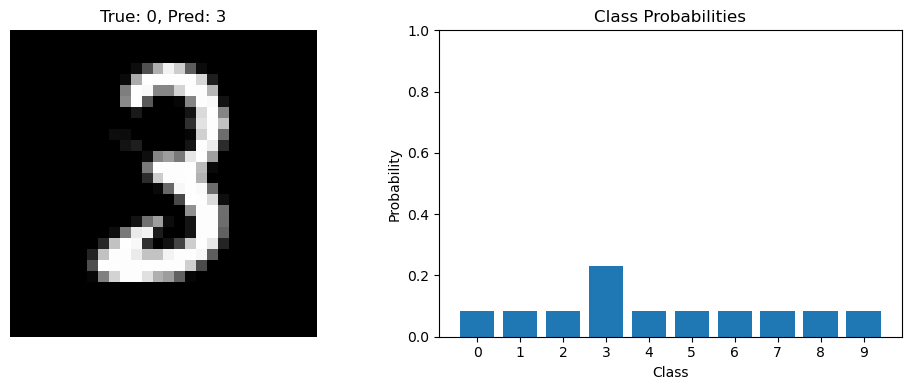

In [64]:
# Function to create and display a heatmap for a single image
def display_heatmap(image, prediction_logits, true_label, predicted_label, class_names=None):
    # Convert logits to probabilities using softmax
    probabilities = torch.nn.functional.softmax(prediction_logits, dim=0).cpu().numpy()
    
    # Create a heatmap
    plt.figure(figsize=(10, 4))

    # Display the input image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

    # Display the heatmap of probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(len(probabilities)), probabilities, tick_label=class_names if class_names else range(len(probabilities)))
    plt.title("Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Set the model to evaluation mode
model.eval()

# Display heatmaps for a few test samples
num_samples_to_display = 5
counter = 0

class_names = [str(i) for i in range(10)]  # Assuming digits (0-9) for class names

with torch.no_grad():  # Disable gradient computation for testing
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass to get predictions
        predictions = model(inputs)
        
        for i in range(inputs.size(0)):
            if counter >= num_samples_to_display:
                break
            
            # Extract the current image, true label, and logits
            image = inputs[i].cpu().squeeze()  # Move to CPU and remove channel dimension
            true_label = labels[i].item()
            prediction_logits = predictions[i]
            predicted_label = torch.argmax(prediction_logits).item()
            
            # Display heatmap
            display_heatmap(image, prediction_logits, true_label, predicted_label, class_names)
            
            counter += 1
        
        if counter >= num_samples_to_display:
            break


C:\Users\chris\AppData\Local\Temp\ipykernel_47940\2831627634.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


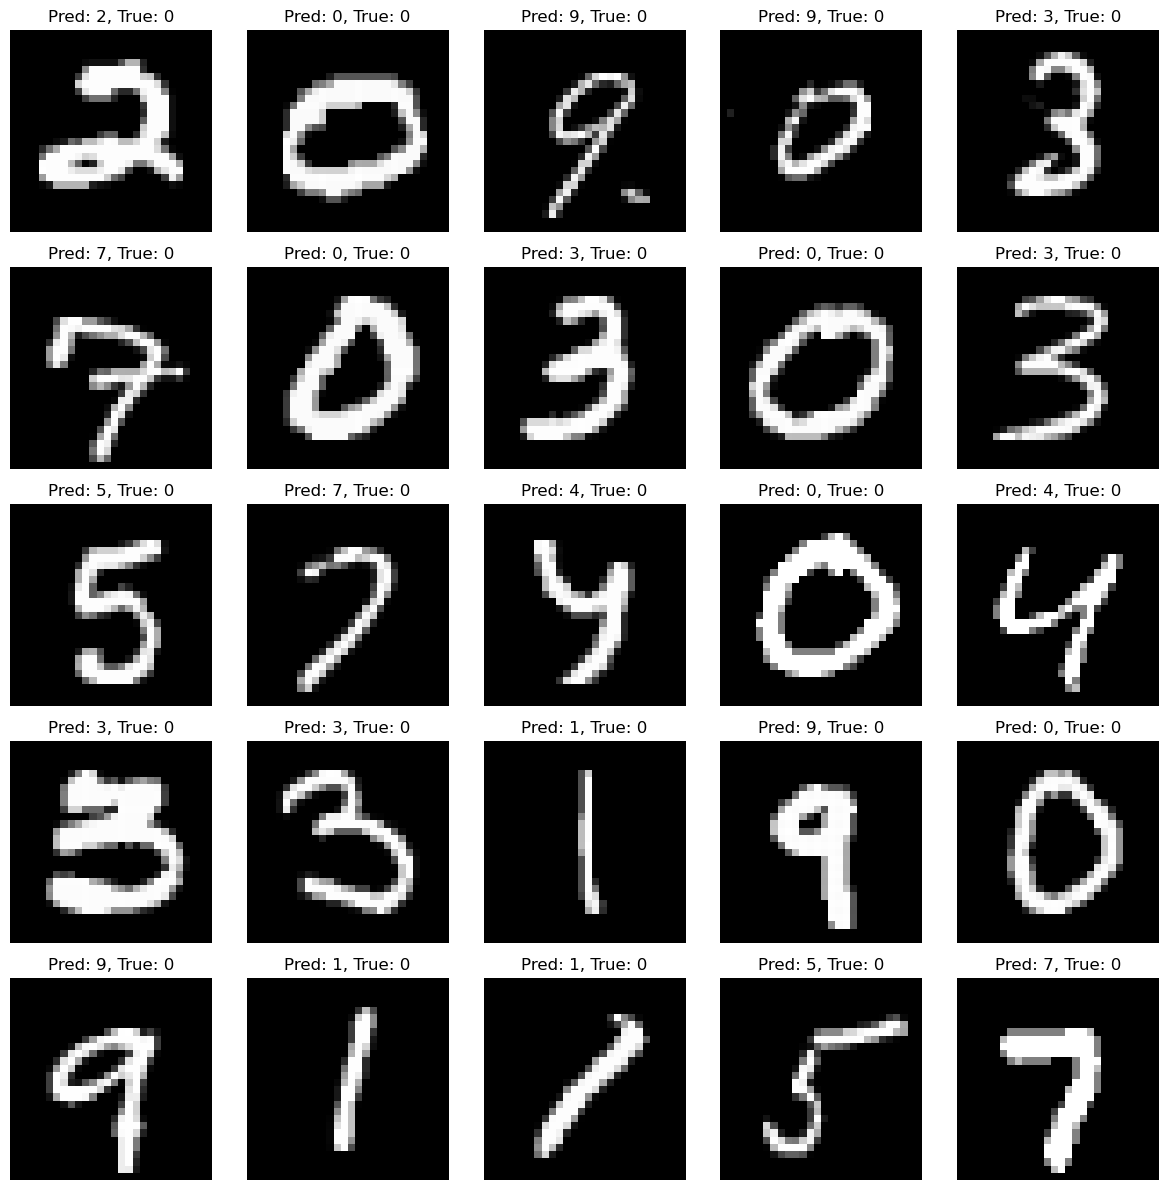

In [57]:
# Set the model to evaluation mode
model.eval()

# Create a figure for displaying images
fig, axes = plt.subplots(5, 5, figsize=(12, 12))  # Display 25 images in a grid (5x5)
axes = axes.flatten()  # Flatten the axes for easy indexing

# Counter to limit the number of images displayed
max_images = 25
counter = 0

with torch.no_grad():  # Disable gradient computation for testing
    for inputs, labels in test_loader:  # Loop through batches in the test dataset
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass to get predictions
        predictions = model(inputs)
        predicted_classes = torch.argmax(predictions, dim=1)  # Get predicted class indices
        
        # Loop through each image in the batch
        for i in range(inputs.size(0)):
            if counter >= max_images:  # Stop once we've displayed enough images
                break
            
            # Get the current image, prediction, and true label
            image = inputs[i].cpu().squeeze()  # Move to CPU and remove channel dimension
            true_label = labels[i].item()
            predicted_label = predicted_classes[i].item()
            
            # Display the image
            axes[counter].imshow(image, cmap='gray')
            axes[counter].set_title(f"Pred: {predicted_label}, True: {true_label}")
            axes[counter].axis('off')
            
            counter += 1
        
        if counter >= max_images:  # Stop outer loop if enough images have been displayed
            break

plt.tight_layout()
plt.show()
